# Introducción

###  El producto interior bruto (PIB) es un indicador económico que refleja el valor monetario de todos los bienes y servicios finales producidos por un país o región en un determinado periodo de tiempo, normalmente un año. Se utiliza para medir la riqueza que genera un país. También se conoce como producto bruto interno (PBI).

### El PIB mide la producción total de bienes y servicios de un país, por lo que su cálculo es bastante complejo. Tenemos que conocer todos los bienes y servicios finales que ha producido el país y sumarlos. Es decir, la producción de manzanas, leche, libros, barcos, máquinas y todos los bienes que se hayan producido en el país hasta los servicios de un taxi, un dentista, un abogado o un profesor, entre otros.

### En el Ecuador dentro de su PIB se encuentran productos de exportación como el cacao. banano, petroleo, flores, entre otros, tambien cabe destacar que otro de los principales generadores de PIB del Ecuador están la empresas privadas (medianas y grandes), ya que al generar rubros mensuales importantes, permiten que el Ecuador tenga mas ingreso de capital.

# Resultados

In [25]:
#CARGA DE DATOS

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt 
import datetime as dt
import seaborn as sns
import numpy as np
import pandas as pd
import os
import dateutil.parser
import datetime as dt
    
data = pd.read_csv("S:/Universidad/10mo/Simulacion/TrabajoEnClasesSimulacionPIBEcuador/EcuadorPIB.csv")
data

ANIO        PIB
0   1960   9.547575
1   1961   8.957493
2   1962  10.241499
3   1963   9.233322
4   1964   8.900054
..   ...        ...
56  2016  19.504791
57  2017  20.832818
58  2018  22.604684
59  2019  23.390040
60  2020  21.284936

[61 rows x 2 columns]

In [26]:
# Tamanio dataset
data.shape

(61, 2)

In [27]:
# Informacion dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ANIO    61 non-null     int64  
 1   PIB     61 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 1.1 KB


In [28]:
# Describiendo el dataset
data.describe()

ANIO        PIB
count    61.000000  61.000000
mean   1990.000000  19.469206
std      17.752934   6.852415
min    1960.000000   8.502946
25%    1975.000000  14.731983
50%    1990.000000  20.035841
75%    2005.000000  23.390040
max    2020.000000  34.163640

In [29]:
# Creando X & Y 
X = data['ANIO']
y = data['PIB']

# Dividiendo las variables para entenamiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, 
                                                    test_size = 0.3, random_state = 100)

In [30]:
X_train

38    1998
42    2002
26    1986
54    2014
47    2007
45    2005
17    1977
7     1967
58    2018
40    2000
37    1997
35    1995
44    2004
19    1979
13    1973
1     1961
31    1991
4     1964
27    1987
50    2010
22    1982
29    1989
9     1969
16    1976
43    2003
36    1996
55    2015
59    2019
49    2009
14    1974
51    2011
2     1962
34    1994
30    1990
10    1970
48    2008
15    1975
23    1983
39    1999
3     1963
24    1984
8     1968
Name: ANIO, dtype: int64

In [31]:
y_train

38    17.891951
42    21.492374
26    15.629403
54    28.051854
47    31.931768
45    27.618174
17    16.302877
7     10.107187
58    22.604684
40    32.127535
37    21.534926
35    21.286903
44    24.554349
19    17.908078
13    17.878038
1      8.957493
31    23.674584
4      8.900054
27    15.366087
50    27.894956
22    14.656491
29    20.283049
9      8.502946
16    16.035636
43    22.598400
36    22.273285
55    21.258221
59    23.390040
49    25.249108
14    22.652051
51    31.121200
2     10.241499
34    20.279818
30    22.764372
10     9.441228
48    34.163640
15    16.070894
23    15.559615
39    26.377542
3      9.233322
24    17.376420
8     11.042166
Name: PIB, dtype: float64

In [32]:
import statsmodels.api as sm

# Agregagando una constante para obtener una intersección
X_train_sm = sm.add_constant(X_train)

In [33]:
# Ajustando la regresion usando 'OLS'
lr = sm.OLS(y_train, X_train_sm).fit()

# Visualizamos los parametros
lr.params

const   -660.030235
ANIO       0.341656
dtype: float64

In [34]:
#MOSTRAMOS LOS RESULTADOS DE LA REGRESION
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    PIB   R-squared:                       0.709
Model:                            OLS   Adj. R-squared:                  0.702
Method:                 Least Squares   F-statistic:                     97.62
Date:                Tue, 27 Apr 2021   Prob (F-statistic):           2.73e-12
Time:                        15:46:28   Log-Likelihood:                -114.62
No. Observations:                  42   AIC:                             233.2
Df Residuals:                      40   BIC:                             236.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -660.0302     68.812     -9.592      0.000    -799.105    -520.955
ANIO           0.3417      0.035      9.880      0.000       0.272       0.412
==============================================================================
Omnibus:                        2.397   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.302   Jarque-Bera (JB):                1.607
Skew:                           0.468   Prob(JB):                        0.448
Kurtosis:                       3.202   Cond. No.                     2.34e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.34e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [35]:
#PIB= -660.0302 + 0.3417 * ANIO

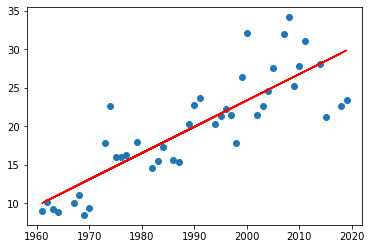

In [36]:
# Visualizando la linea de regresion
plt.scatter(X_train, y_train)
plt.plot(X_train, -660.0302 + 0.3417 * X_train, 'r')
plt.show()

In [38]:
# Prediciendo valor de y usando la data de entrenamiento de X
y_train_pred = lr.predict(X_train_sm)

# Creando residuos del entrenamiento de y_train y prediciendo y_data
res = (y_train - y_train_pred)

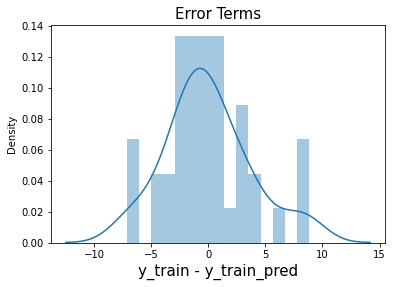

In [39]:
# Visualizando el histograma usando los valores del residuo
fig = plt.figure()
sns.distplot(res, bins = 15)
plt.title('Error Terms', fontsize = 15)
plt.xlabel('y_train - y_train_pred', fontsize = 15)
plt.show()

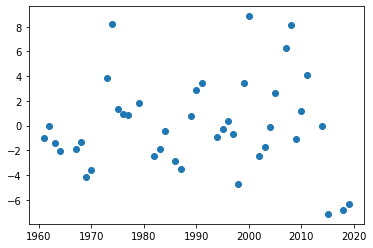

In [40]:
# Podemos ver patrones de nuestro res
plt.scatter(X_train,res)
plt.show()

In [41]:
# Anadiendo una constante a X_test
X_test_sm = sm.add_constant(X_test)

#  Prediciendo los valores de y que corresponden a X_test_sm
y_test_pred = lr.predict(X_test_sm)

# Visualizando los 18 primeros valores predecidos
y_test_pred

11    13.373636
28    19.181787
52    27.381530
18    15.765227
46    25.331594
12    13.715292
5     11.323700
53    27.723186
60    30.114777
33    20.890067
25    18.156819
6     11.665356
21    16.790195
0      9.615420
20    16.448539
56    28.748153
57    29.089809
32    20.548411
41    23.623314
dtype: float64

## Resultados de la regresión

In [42]:
from sklearn.metrics import r2_score

# Vizualisamos el valor de R-cuadrado en test
r_squared = r2_score(y_test, y_test_pred)
r_squared

0.6276373700373603

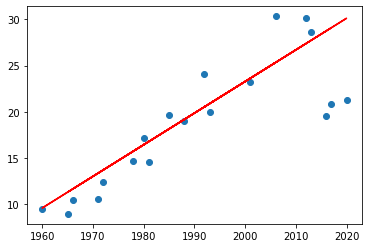

In [43]:
# Visualizando la linea de regresion con el set de test
plt.scatter(X_test, y_test)
plt.plot(X_test, y_test_pred, 'r')
plt.show()

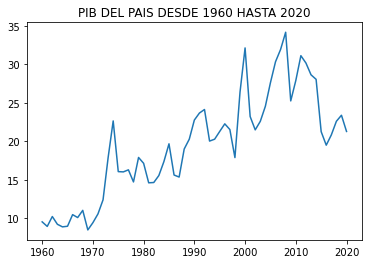

In [45]:
#la ultima fecha tomada es del 08/04/2021 o en este caso 842021
plt.title('PIB DEL PAIS DESDE 1960 HASTA 2020')
plt.plot(X,y)

## Resultados de la predicción

In [46]:
num_anios=4
anios=np.zeros(num_anios,int)
cont=2021

#Guardamos en un arreglo los años

for i in range (0,num_anios):
    anios[i]=cont;
    cont=cont+1;
    
#Realizamos las predicciones de los años del PIB
#PIB= -660.0302 + 0.3417 * años

pib=np.zeros(num_anios)

for i in range(0,num_anios):
    pib[i] = (-660.0302 + 0.3417 * anios[i])
print("ANIOS: ",anios)
print("PIB: ",pib)

ANIOS:  [2021 2022 2023 2024]
PIB:  [30.5455 30.8872 31.2289 31.5706]


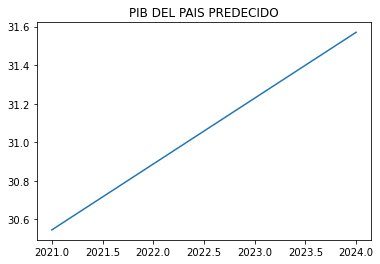

In [47]:
plt.title('PIB DEL PAIS PREDECIDO')
plt.plot(anios,pib)

# Opinión

### El PIB del Ecuador cada vez va a ir subiend más con el paso de los años, también tendrá años en los que el PIB baje, como por ejemplo el año 2020 a causa de la pandemia global, pero segun el de los datos del PIB de país desde 1960 veremos que ira creciendo regularmente

# Conclusiones

## Al concluir este trabajo se puede decir que el PIB del Ecuador ha ido creciendo de una manera notable cada 10 años. También se puede observar que dentro de esos 10 años, cada 5 ha tenido sus irregularidades (altos y bajos), pero conforme pasan las décadas este ha crecido de forma regular. 

## Cabe recalcar que el PIB en el Ecuador en el año 2020 ha bajado por la llegada de la pandemia COVID-19 cayendo un 9% con respecto al 2019. Pero para el año 2021 según las predicciones este llegará a subir hasta 30.5.

## Actualmente con el cambio de gobierno el PIB tiende a una proyección positiva, ya que se abren muchas puertas de exportaciones hacia economias extranjeras como por ejemplo Estados Unidos, como tambíen mayores posibilidades de inversion de organizaciones de fuera del país.

# Referencias

### Ecuador, B. C. (2019). La pandemia incidió en el crecimiento 2020: la economía ecuatoriana decreció 7,8%. https://www.bce.fin.ec/index.php/boletines-de-prensa-archivo/item/1421-la-pandemia-incidio-en-el-crecimiento-2020-la-economia-ecuatoriana-decrecio-7-8

### Sevilla, A. (n.d.). Producto interior bruto (PIB) - Qué es, definición y significado | 2021 | Economipedia. Retrieved April 27, 2021, from https://economipedia.com/definiciones/producto-interior-bruto-pib.html
